In [40]:
import os

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import matplotlib as mpl
import seaborn as sns
sns.set_theme("paper", style="whitegrid", font="serif", font_scale=2.4)
mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "lightgray"
mpl.rcParams["grid.linestyle"] = "--"
mpl.rcParams["grid.linewidth"] = 0.5
plt.rc("text", usetex=False)

In [42]:
sort_names = ["Kiwi 22","Kiwi 23 XL","Kiwi 23 XXL","xCOMET XL",
              "xCOMET XXL","MetricX 23 L","MetricX 23 XL","Llama 3.1 70B","Gemma 2 9B","Mistral 7B","GPT4"]

neural =  ["Kiwi 22","Kiwi 23 XL","Kiwi 23 XXL","xCOMET XL","xCOMET XXL","MetricX23 LARGE","MetricX23 XL"]


def get_sort_key(model_name, sort_names):
    # First, sort by the sort_names list
    for i, sort_name in enumerate(sort_names):
        if sort_name in model_name:
            primary_key = i
            break
    else:
        primary_key = len(sort_names)
    
    # Then, sort by STANDARD, TRANSLATED, PARAPHRASED
    if 'MON' in model_name:
        secondary_key = 0
    elif 'BIL' in model_name:
        secondary_key = 1
    elif 'CONTEXT' in model_name:
        secondary_key = 2
    elif 'PARAPHRASED' in model_name:
        secondary_key = 3
    else:
        secondary_key = 4
    
    return (primary_key, secondary_key)

### TABLES FOR NON-AMBIGUOUS CONTEXTUAL CASE

In [ ]:
results_df_path = './results/stats/nonambiguous-contextual/prediction-analysis/results.csv'
results_df = pd.read_csv(results_df_path,header=0)
results_df['model'] = results_df['model'].apply(lambda x: x.replace('translated ctx','BIL') if "translated" in x else x)
results_df['model'] = results_df['model'].apply(lambda x: x.replace('paraphrased ctx','PARAPHRASED') if "paraphrased" in x else x)
results_df['model'] = results_df['model'].apply(lambda x: x.replace('standard ctx','MON') if ("standard" in x  and x.split("--")[0] in neural) else x)
results_df['model'] = results_df['model'].apply(lambda x: x.replace('standard ctx','CONTEXT') if ("standard" in x  and   x.split("--")[0]  not in neural) else x)
results_df['model'] = results_df['model'].apply(lambda x: x.replace('MetricX23 LARGE',r'MetricX 23 L') if "MetricX23 LARGE" in x else x)
results_df['model'] = results_df['model'].apply(lambda x: x.replace('MetricX23 XL',r'MetricX 23 XL') if "MetricX23 XL" in x else x)




Create Table for reporting aggregated results across languages. (Table 2 of paper and Table 8)

In [44]:
results_aggr_tab2 = results_df.pivot_table(index='model',values=['error_rate_total','error_rate_male','error_rate_fem','error_rate_ratio'])
# results_aggr_tab2.sort_values(by='error_rate_total', ascending=True)
results_aggr_tab2.round(2)


,error_rate_fem,error_rate_male,error_rate_ratio,error_rate_total
model,,,,
GPT 4--CONTEXT,0.61,0.24,2.64,0.44
Gemma 2 9B--CONTEXT,0.81,0.31,2.71,0.57
Gemma 2 9B--PARAPHRASED,0.82,0.34,2.54,0.59
Kiwi 22--BIL--NLLB 3.3B,0.28,0.10,6.68,0.19
Kiwi 22--original ctx,0.25,0.32,0.84,0.28
Kiwi 23 XL--BIL--NLLB 3.3B,0.24,0.09,5.09,0.17
Kiwi 23 XL--original ctx,0.26,0.30,0.92,0.28
Kiwi 23 XXL--BIL--NLLB 3.3B,0.19,0.08,4.85,0.14
Kiwi 23 XXL--original ctx,0.19,0.09,2.20,0.14


Create Statistical Significance table for Φ per language (Table 9 of paper)

In [45]:
def create_significance_table_Phi_ratio(df):
    # Extract unique models and languages from the DataFrame
    models = df['model'].unique()
    languages = ['de', 'es', 'fr', 'it', 'pt', 'ru', 'hi', 'ar']

    # Define the LaTeX table header
    table_header = r"""
    \begin{table*}
    \centering
    \small
    \begin{tabular}{l""" + "c" * len(languages) + r"""}
    \toprule
    \rowcolor{white}
    \textbf{Metrics} & \multicolumn{""" + str(len(languages)) + r"""}{c}{$ER(S^F) / ER(S^M)$ } \\
    & """ + " & ".join(languages) + r""" \\
    \midrule
    """

    # Generate table rows for each model
    table_rows = ""
    for model in models:
        # Get data for the current model
        model_data = df[df['model'] == model].set_index('lang')

        # Construct the row with ratio first and significance in parentheses
        row = model + " & " + " & ".join(
            [
                f"{model_data.loc[lang, 'error_rate_ratio']:.3f} " +
                (r"\gabad" if model_data.loc[lang, 'stat_significance'] else r"\gagood") + ""
                if lang in model_data.index else "!"
                for lang in languages
            ]
        ) + r" \\" + "\n"
        
        # Add spacing after certain models (optional)
        if model == models[2] or model == models[4]:
            row += r"\addlinespace[0.2cm]" + "\n"
        
        table_rows += row

    # Define the LaTeX table footer
    table_footer = r"""
    \bottomrule
    \end{tabular}
    \caption{\textbf{MT-GenEval Contextual Results} on human-written translations. 
    A green check mark (\cmark) indicates that ....} 
    \label{tab:contextual_stat_tests}
    \end{table*}
    """

    # Combine header, rows, and footer
    latex_table = table_header + table_rows + table_footer
    
    return latex_table

results_df_statistical  = results_df[['model','lang','stat_significance','error_rate_ratio']]
stat_table_latex = create_significance_table_Phi_ratio(results_df_statistical)
print(stat_table_latex)


    \begin{table*}
    \centering
    \small
    \begin{tabular}{lcccccccc}
    \toprule
    \rowcolor{white}
    \textbf{Metrics} & \multicolumn{8}{c}{$ER(S^F) / ER(S^M)$ } \\
    & de & es & fr & it & pt & ru & hi & ar \\
    \midrule
    GPT 4--CONTEXT & 2.705 \gabad & 3.016 \gabad & 2.444 \gabad & 2.811 \gabad & 2.784 \gabad & 2.556 \gabad & 2.202 \gabad & 2.580 \gabad \\
Gemma 2 9B--PARAPHRASED & 2.972 \gabad & 2.935 \gabad & 3.029 \gabad & 2.508 \gabad & 2.861 \gabad & 2.286 \gabad & 1.959 \gabad & 1.806 \gabad \\
Gemma 2 9B--CONTEXT & 3.129 \gabad & 3.034 \gabad & 2.869 \gabad & 2.654 \gabad & 3.458 \gabad & 2.271 \gabad & 2.127 \gabad & 2.148 \gabad \\
\addlinespace[0.2cm]
Kiwi 22--original ctx & 0.691 \gagood & 0.853 \gagood & 0.895 \gagood & 1.117 \gabad & 1.068 \gabad & 0.724 \gagood & 0.638 \gagood & 0.704 \gagood \\
Kiwi 22--BIL--NLLB 3.3B & 6.636 \gabad & 9.068 \gabad & 8.990 \gabad & 8.278 \gabad & 7.364 \gabad & 10.820 \gabad & 1.506 \gabad & 0.807 \gagood \\
\addlines

Create Table with Ties (Table 13)

In [ ]:
ties_path = './results/stats/nonambiguous-contextual/ties/results.csv'
ties = pd.read_csv(ties_path,header=0)
ties['model'] = ties['model'].apply(lambda x: x.replace('translated ctx','BIL') if "translated" in x else x)
ties['model'] = ties['model'].apply(lambda x: x.replace('paraphrased ctx','PARAPHRASED') if "paraphrased" in x else x)
ties['model'] = ties['model'].apply(lambda x: x.replace('standard ctx','MON') if ("standard" in x  and x.split("--")[0] in neural) else x)
ties['model'] = ties['model'].apply(lambda x: x.replace('standard ctx','CONTEXT') if ("standard" in x  and   x.split("--")[0]  not in neural) else x)
ties['model'] = ties['model'].apply(lambda x: x.replace('MetricX23 LARGE',r'MetricX 23 L') if "MetricX23 LARGE" in x else x)
ties['model'] = ties['model'].apply(lambda x: x.replace('MetricX23 XL',r'MetricX 23 XL') if "MetricX23 XL" in x else x)


In [47]:
ties_aggr = ties.pivot_table(index='model',values='ties')
ties_aggr.round(2)

,ties
model,
GPT 4--CONTEXT,38.34
Gemma 2 9B--CONTEXT,49.65
Gemma 2 9B--PARAPHRASED,51.67
Kiwi 22--BIL--NLLB 3.3B,0.00
Kiwi 22--original ctx,0.00
Kiwi 23 XL--BIL--NLLB 3.3B,0.00
Kiwi 23 XL--original ctx,0.00
Kiwi 23 XXL--BIL--NLLB 3.3B,0.00
Kiwi 23 XXL--original ctx,0.00


Create Figure 9 of the paper - Comparison of translated context models NLLB vs GT

In [ ]:
translate_ctx_df_path = './results/stats/nonambiguous-contextual/translated_ctx_comparison/results.csv'
translate_ctx_df = pd.read_csv(translate_ctx_df_path,header=0)
    
error_rate_cols = ['error_rate_total', 'error_rate_male', 'error_rate_fem', 'error_rate_diff', 'error_rate_ratio']
translate_ctx_df_aggr = translate_ctx_df.groupby('model')[error_rate_cols].agg(['mean', 'std'])

# Flatten the multi-level column names
translate_ctx_df_aggr.columns = ['_'.join(col) for col in translate_ctx_df_aggr.columns]
translate_ctx_df_aggr = translate_ctx_df_aggr.reset_index()
translate_ctx_df_aggr['model'] = translate_ctx_df_aggr['model'].apply(lambda x: x.replace('translated ctx','TRANSLATED') if "translated" in x else x)
translate_ctx_df_aggr['model'] = translate_ctx_df_aggr['model'].apply(lambda x: x.replace('paraphrased ctx','PARAPHRASED') if "paraphrased" in x else x)
translate_ctx_df_aggr['model'] = translate_ctx_df_aggr['model'].apply(lambda x: x.replace('standard ctx','ORIGINAL') if "standard" in x else x)
translate_ctx_df_aggr['model'] = translate_ctx_df_aggr['model'].apply(lambda x: x.replace('MetricX23 LARGE','MetricX 23 L') if "MetricX23 LARGE" in x else x)
translate_ctx_df_aggr['model'] = translate_ctx_df_aggr['model'].apply(lambda x: x.replace('MetricX23 XL','MetricX 23 XL') if "MetricX23 XL" in x else x)
translate_ctx_df_aggr['model'] = translate_ctx_df_aggr['model'].apply(lambda x: x.replace('Kiwi','CometKiwi') )

In [49]:
translate_ctx_df_aggr.model.unique()

array(['CometKiwi 22--TRANSLATED--GT',
       'CometKiwi 22--TRANSLATED--NLLB 3.3B',
       'CometKiwi 23 XL--TRANSLATED--GT',
       'CometKiwi 23 XL--TRANSLATED--NLLB 3.3B',
       'CometKiwi 23 XXL--TRANSLATED--GT',
       'CometKiwi 23 XXL--TRANSLATED--NLLB 3.3B',
       'MetricX 23 L--TRANSLATED--GT',
       'MetricX 23 L--TRANSLATED--NLLB 3.3B',
       'MetricX 23 XL--TRANSLATED--GT',
       'MetricX 23 XL--TRANSLATED--NLLB 3.3B',
       'xCOMET XL--TRANSLATED--GT', 'xCOMET XL--TRANSLATED--NLLB 3.3B',
       'xCOMET XXL--TRANSLATED--GT', 'xCOMET XXL--TRANSLATED--NLLB 3.3B'],
      dtype=object)

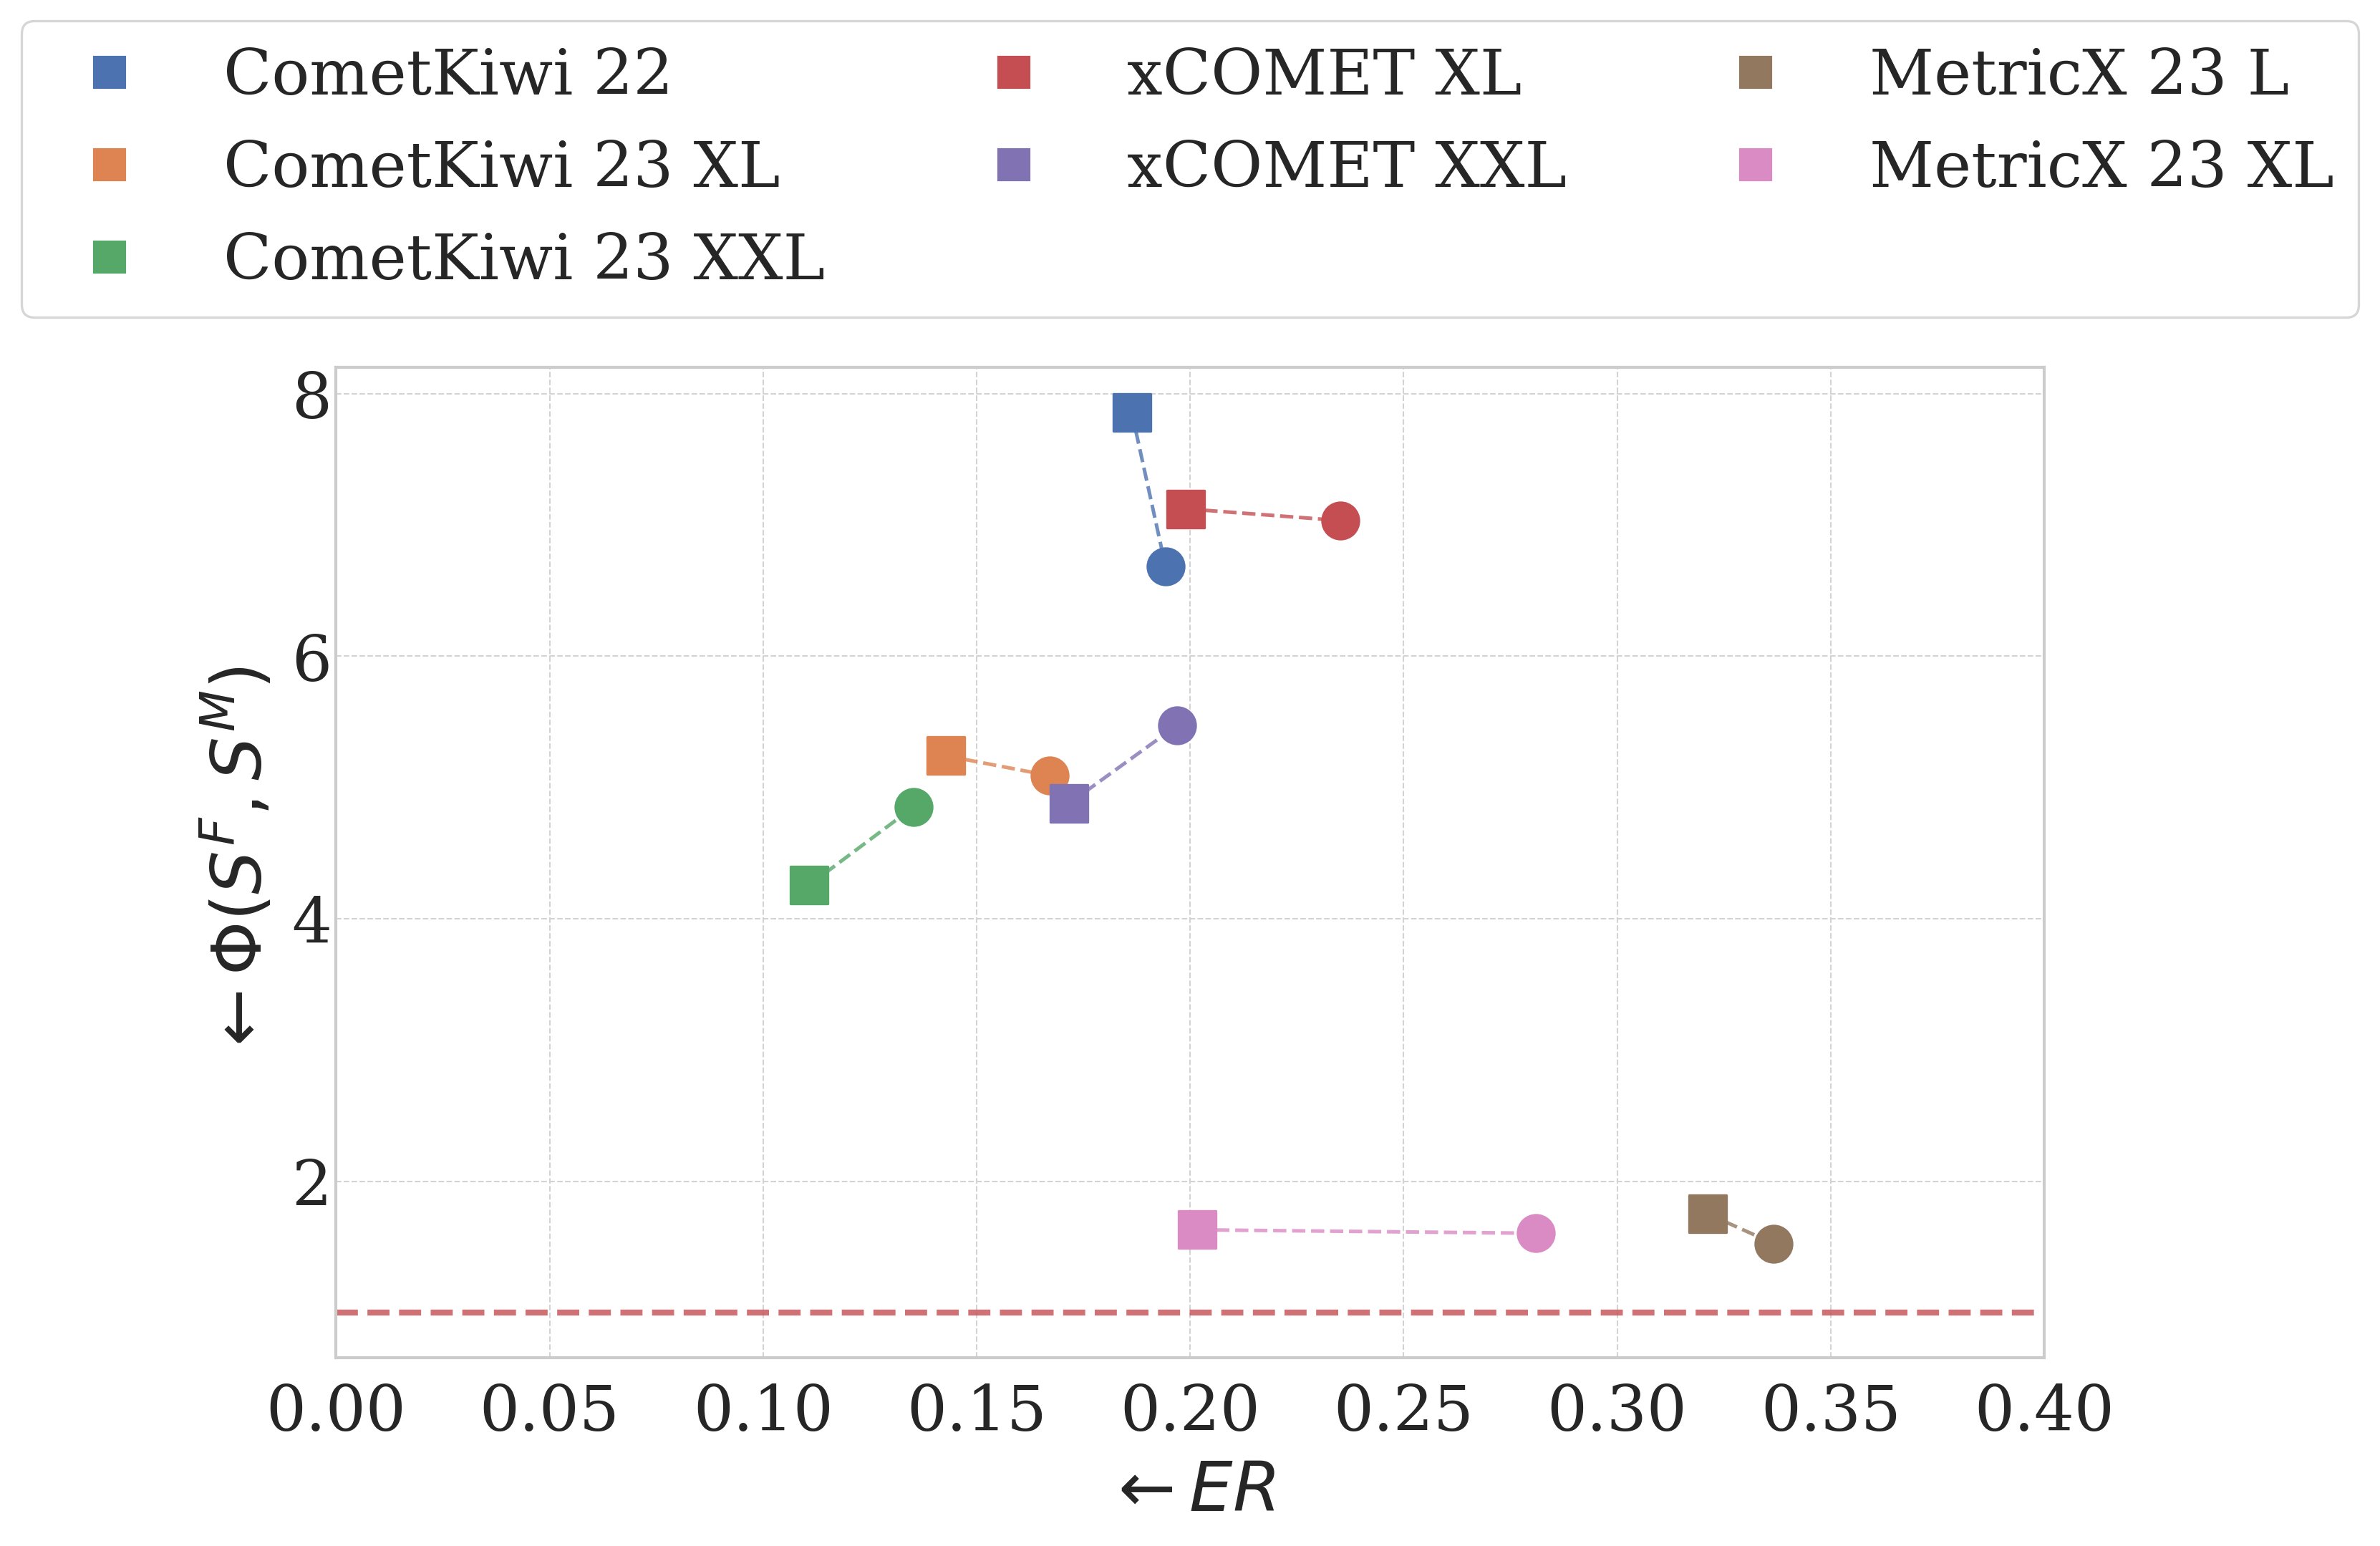

In [50]:
import matplotlib.lines as mlines

# Define categories and sorting function
sort_names = ["CometKiwi 22", "CometKiwi 23 XL", "CometKiwi 23 XXL", "xCOMET XL",
              "xCOMET XXL", "MetricX 23 L", "MetricX 23 XL"]

def get_sort_key(model_name, sort_names):
    # First, sort by the sort_names list
    for i, sort_name in enumerate(sort_names):
        if sort_name in model_name:
            primary_key = i
            break
    else:
        primary_key = len(sort_names)
    
    # Then, sort by STANDARD, TRANSLATED, PARAPHRASED
    if 'ORIGINAL' in model_name:
        secondary_key = 0
    elif 'TRANSLATED' in model_name:
        secondary_key = 1
    else:
        secondary_key = 2
    
    return (primary_key, secondary_key)

# Sort the DataFrame in reverse order
translate_ctx_df_aggr['sort_order'] = translate_ctx_df_aggr['model'].apply(lambda x: get_sort_key(x, sort_names))
translate_ctx_df_aggr = translate_ctx_df_aggr.sort_values('sort_order')

# Create the plot
plt.figure(figsize=(11, 8),dpi=300)

# Generate a color palette
# n_colors = len(translate_ctx_df_aggr['sort_order'])   # Additional color for models not in sort_names
color_palette = sns.color_palette(None, n_colors=len(sort_names))

# Create a color map dictionary based on the sorted order
color_map = {model: color_palette[i] for i, model in enumerate(sort_names)}
color_map["Other"] = color_palette[-1]

# Define marker styles
def get_marker(model_name):
    if 'GT' in model_name:
        return 's'  # Square for GT models
    elif 'NLLB 3.3B' in model_name:
        return 'o'  # Circle for NLLB3.3B models
    elif 'Tower' in model_name:
        return '^'  # Triangle for Tower
    else:
        return '+'

# Define color mapping based on sorted model categories
def get_color(model_name):
    for sort_name in sort_names:
        if sort_name in model_name:
            return color_map[sort_name]
    return color_map["Other"]


for _, row in translate_ctx_df_aggr.iterrows():
    color = get_color(row['model'])
    plt.scatter(row['error_rate_total_mean'], 
                row['error_rate_ratio_mean'],
                marker=get_marker(row['model']),
                c=[color],
                s=150,
                label=str(row['model']))

# Connect points with the same color using dashed lines
for color in set(color_map.values()):
    group = translate_ctx_df_aggr[translate_ctx_df_aggr['model'].apply(lambda x: get_color(x) == color)]
    if not group.empty:
        plt.plot(group['error_rate_total_mean'], 
                 group['error_rate_ratio_mean'], 
                 '--', c=color, alpha=0.8)

# Customize the plot
plt.xlabel(r"$\leftarrow ER$",labelpad=5)
plt.ylabel(r"$\leftarrow \Phi(S^F,S^M)$",labelpad=5)

# Add a horizontal line at y=1 (which represents a ratio of 1)
plt.axhline(y=1, color='r', linestyle='--', alpha=0.8,linewidth=2.0)

# Rotate x-axis labels for better readability
plt.xticks(rotation=0, ha='center')
plt.yticks(rotation=0, ha='center')
# Set x-axis to start from 0
plt.xlim([0,0.4])
# plt.ylim([0,0.5])


legend_elements = []
for sort_name in sort_names:
    color = color_map[sort_name]
    marker = get_marker(next(model for model in translate_ctx_df_aggr['model'] if sort_name in model))
    legend_elements.append(mlines.Line2D([0], [0], color=color, marker='s', linestyle='None',
                                          markersize=10, label=sort_name))

# Add the legend
plt.legend(handles=legend_elements, #title=r"Neural QE Metrics", 
           ncol=3, bbox_to_anchor=(0.5, 1.2), loc='center')

# Adjust layout
plt.tight_layout()

# Save the plot
plt.savefig('./plots/nonambiguous-contextual/mtgeneval/results_2d_comparison_ratio.pdf', 
            bbox_inches='tight',dpi=300)
# plt.savefig("figure.pdf", format="pdf", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

#### Make Figure with Pareto Frontier

In [ ]:
# load -- ambiguous QE scores ratios!
amb_df_path = './results/stats/ambiguous/results_MT-GenEval_contextual_ambiguous.csv'
amb_df = pd.read_csv(amb_df_path,header=[0])
amb_df = amb_df[['model','lang','ratio_mean']]

# load -- unambiguous !
non_amb_df_path = './results/stats/nonambiguous-contextual/prediction-analysis/results.csv'
non_amb_df = pd.read_csv(non_amb_df_path,header=[0])
non_amb_df = non_amb_df[['model','lang','error_rate_ratio','error_rate_total']]

#remove from the plot some models -> [ Gemba-paraphrased versions, all "translate(context)"" versions for neural QE metrics] 
non_amb_df = non_amb_df[~non_amb_df['model'].str.contains('paraphrased ctx', case=True, na=False)]
non_amb_df = non_amb_df[~non_amb_df['model'].str.contains('translated ctx', case=True, na=False)]

#renaming
non_amb_df['model'] = non_amb_df['model'].apply(lambda x: x.replace('--original ctx','') )
non_amb_df['model'] = non_amb_df['model'].apply(lambda x: x.replace('--standard ctx','')  )
non_amb_df['model'] = non_amb_df['model'].apply(lambda x: x.replace('Kiwi','CometKiwi')  )
non_amb_df['model'] = non_amb_df['model'].apply(lambda x: x.replace('MetricX23 LARGE','MetricX 23 L')  )
non_amb_df['model'] = non_amb_df['model'].apply(lambda x: x.replace('MetricX23 XL','MetricX 23 XL')  )
non_amb_df['model'] = non_amb_df['model'].apply(lambda x: x.replace('GPT 4','GPT 4o')  )




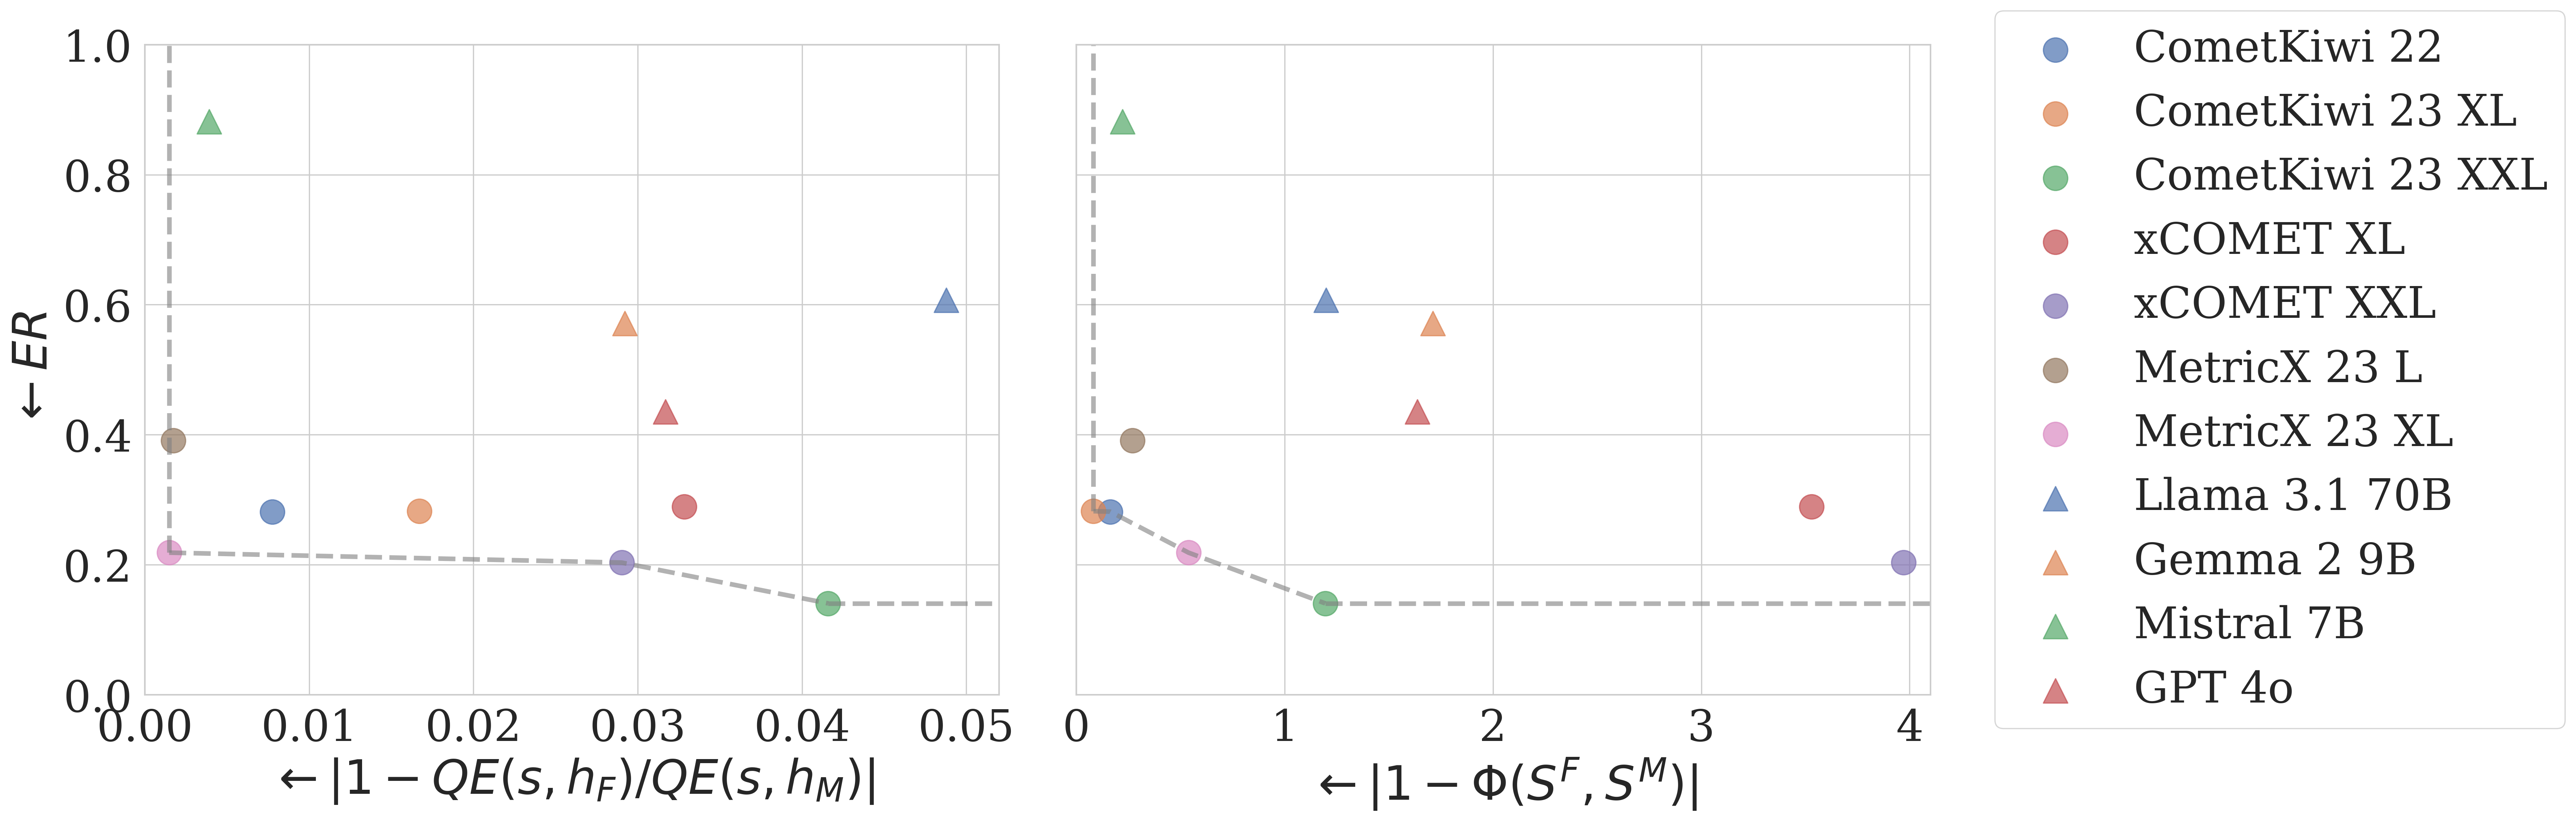

In [81]:
sns.set_theme("paper", style="whitegrid", font="serif", font_scale=3.2)

def create_plot(df_ambiguous,df_unambiguous ):
    sort_names = ["CometKiwi 22","CometKiwi 23 XL","CometKiwi 23 XXL","xCOMET XL",
                "xCOMET XXL","MetricX 23 L","MetricX 23 XL","Llama 3.1 70B","Gemma 2 9B","Mistral 7B","GPT 4o"]

    LLMs = ["Llama 3.1 70B","Gemma 2 9B","Mistral 7B","GPT 4o"]
    neurals = ["CometKiwi 22","CometKiwi 23 XL","CometKiwi 23 XXL","xCOMET XL",
                "xCOMET XXL","MetricX 23 L","MetricX 23 XL"]

    def get_sort_names(model_name, sort_names):
        # First, sort by the sort_names list
        for i, sort_name in enumerate(sort_names):
            if sort_name in model_name:
                primary_key = i
                break
        return primary_key

    def pareto_frontier(data, x_col, y_col):
        """Find the Pareto frontier from the data points.
        Points closer to (0, 0) are better.
        """
        pareto_data = data.sort_values([x_col, y_col], ascending=[True, True])
        pareto_front = [pareto_data.iloc[0]]  # Start with the best point
        for i in range(1, len(pareto_data)):
            current_point = pareto_data.iloc[i]
            if current_point[y_col] < pareto_front[-1][y_col]:
                pareto_front.append(current_point)
        return pd.DataFrame(pareto_front)

    def find_min_point(data, col):
        """Find the point that minimizes both the x and y columns."""
        point = data.loc[data[col].idxmin()]  # Point with the lowest x value
        return point
    # # Min-Max normalization function
    def min_max_normalize(column):
        return (column - column.min()) / (column.max() - column.min())



    # Aggregate over languages by calculating the mean for each model
    agg_non_amb_error_total = df_unambiguous.groupby('model')['error_rate_total'].mean().reset_index()
    agg_non_amb_error_ratio = df_unambiguous.groupby('model')['error_rate_ratio'].mean().reset_index()
    agg_amb = df_ambiguous.groupby('model')['ratio_mean'].mean().reset_index()

    # Define seaborn color palette for different models
    colors_neural = sns.color_palette(None, len(neurals))  # Use a palette with enough distinct colors for models
    colors_llms = sns.color_palette(None, len(LLMs))  # Use a palette with enough distinct colors for models


    # Merge the aggregated DataFrames for left plot
    merged_left = agg_amb.merge(agg_non_amb_error_total, on='model')
    merged_left['sort_order'] = merged_left['model'].apply(lambda x: get_sort_names(x, sort_names))
    merged_left = merged_left.sort_values('sort_order')

    # Merge the aggregated DataFrames for right plot
    merged_right = agg_non_amb_error_ratio.merge(agg_non_amb_error_total, on='model')
    merged_right['sort_order'] = merged_right['model'].apply(lambda x: get_sort_names(x, sort_names))
    merged_right = merged_right.sort_values('sort_order')




    merged_left['ratio_mean'] = merged_left['ratio_mean'].apply(lambda x: np.abs((1.0-x)) )
    merged_right['error_rate_ratio'] = merged_right['error_rate_ratio'].apply(lambda x: np.abs((1.0-x)) )


    # merged_left['ratio_mean'] = min_max_normalize(merged_left['ratio_mean'])
    # merged_right['error_rate_ratio']  =min_max_normalize(merged_right['error_rate_ratio'])




    # Find Pareto frontier for the left plot
    pareto_left = pareto_frontier(merged_left, 'ratio_mean', 'error_rate_total')

    # Find Pareto frontier for the right plot
    pareto_right = pareto_frontier(merged_right, 'error_rate_ratio', 'error_rate_total')




    # Find the minimum points for the left plot (Ambiguous vs Non-Ambiguous Total Error Rate)
    min_left_ratio = find_min_point(merged_left, 'ratio_mean')
    min_left_er = find_min_point(merged_left, 'error_rate_total')

    # Find the minimum points for the right plot (Non-Ambiguous Error Rate Ratio vs Total Error Rate)
    min_right_ratio = find_min_point(merged_right, 'error_rate_ratio')
    min_right_er = find_min_point(merged_right, 'error_rate_total')



    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(24,8),sharey=True,dpi=300)
    index_llms = 0
    index_neural=0
    # Plot Left [   QE ratio (amb)  VS Total Error Rate (non-amb) ]
    for i, model in enumerate(merged_left['model'].unique()):
        model_data = merged_left[merged_left['model'] == model]
        if model in LLMs:
            axes[0].scatter( model_data['ratio_mean'], model_data['error_rate_total'],
                            color=colors_llms[index_llms],marker="^", label=model, s=250, alpha=0.7)
            index_llms+=1
        else:
            axes[0].scatter( model_data['ratio_mean'], model_data['error_rate_total'],
                            color=colors_neural[index_neural],marker="o", label=model, s=250, alpha=0.7)
            index_neural+=1

    # Add labels and title for the first subplot
    axes[0].set_ylabel(r"$\leftarrow ER$")
    axes[0].set_xlabel(r"$\leftarrow |1-QE(s,h_F)/QE(s,h_M)|$")


    index_llms = 0
    index_neural=0
    # Plot Right  [  Error Rate Ratio(non-amb)  VS Total Error Rate (non-amb) ]
    for i, model in enumerate(merged_right['model'].unique()):
        model_data = merged_right[merged_right['model'] == model]
        if model in LLMs:
            axes[1].scatter( model_data['error_rate_ratio'], model_data['error_rate_total'],
                            color=colors_llms[index_llms],marker="^", label=model, s=250, alpha=0.7)
            index_llms+=1
        else:
            axes[1].scatter( model_data['error_rate_ratio'], model_data['error_rate_total'],
                            color=colors_neural[index_neural],marker="o", label=model, s=250, alpha=0.7)
            index_neural+=1


    # Add labels and title for the first subplot
    axes[1].set_xlabel(r"$\leftarrow |1-\Phi(S^F,S^M)|$")
    axes[1].legend(loc='center left', bbox_to_anchor=(1.05, 0.5))



    axes[0].set_ylim([0,1])
    # axes[1].set_ylim([0,1])
    axes[0].set_xlim([0,0.052])
    axes[1].set_xlim([0,4.1])
    # axes[1].set_xlim([-0.1,1.1])
    axes[0].tick_params(axis='both', which='major', )
    axes[1].tick_params(axis='both', which='major', )

    # Add Pareto frontier to the left plot
    axes[0].plot(pareto_left['ratio_mean'], pareto_left['error_rate_total'], linestyle='--', color='gray',alpha=0.6,linewidth=3)
    # Add line to axes
    axes[0].plot([min_left_ratio['ratio_mean'],min_left_ratio['ratio_mean']], [min_left_ratio['error_rate_total'],1.1], 
                linestyle='--', color='gray',alpha=0.6,linewidth=3)  #vertical line
    axes[0].plot([min_left_er['ratio_mean'], 1.1], [min_left_er['error_rate_total'],min_left_er['error_rate_total']], 
                linestyle='--', color='gray',alpha=0.6,linewidth=3)  #horizontal line

    # Add Pareto frontier to the right plot
    axes[1].plot(pareto_right['error_rate_ratio'], pareto_right['error_rate_total'], linestyle='--', color='gray',alpha=0.6,linewidth=3)
    axes[1].plot([min_right_ratio['error_rate_ratio'],min_right_ratio['error_rate_ratio']], [min_right_ratio['error_rate_total'],1.1], 
                linestyle='--', color='gray',alpha=0.6,linewidth=3)  
    axes[1].plot([min_right_er['error_rate_ratio'], 4.2], [min_right_er['error_rate_total'],min_right_er['error_rate_total']], 
                linestyle='--', color='gray',alpha=0.6,linewidth=3) 


    # Save the plot
    plt.savefig('./plots/pareto_frontier.pdf', 
                bbox_inches='tight')

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()


create_plot(amb_df,non_amb_df)